Sometimes outliers can mess up an analysis; you usually don't want a handful of data points to skew the overall results. again that example of income data, with some random multi billionare thrown in:

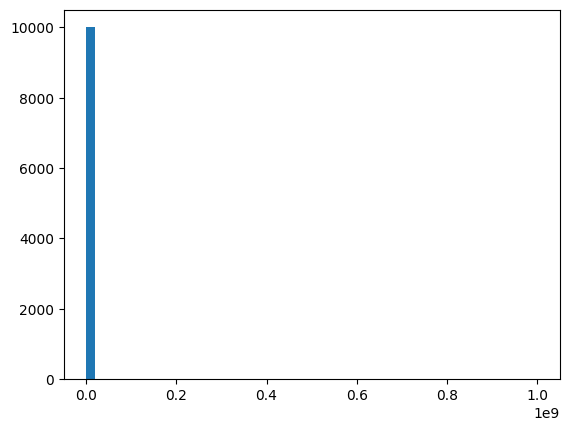

In [1]:
%matplotlib inline
import numpy as np

incomes = np.random.normal(27000, 15000, 10000)
incomes = np.append(incomes, [1000000000])

import matplotlib.pyplot as plt
plt.hist(incomes, 50)
plt.show()

That's not very helpful to look at. One billionaire ended up squeezing everybody else into a single line in my histogram. Plus it skewed my mean income significantly:

In [2]:
incomes.mean()

127194.55615534328

It's important to dig into what is causing your outliers, and understand where they are coming from. You also need to think about whether removing them is a valid thing to do.

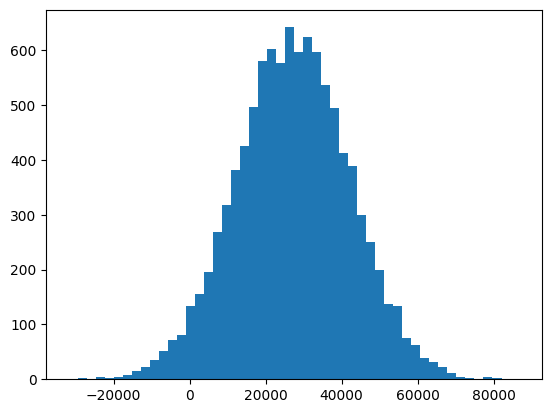

In [3]:
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered

filtered = reject_outliers(incomes)

plt.hist(filtered, 50)
plt.show()

That looks better. And, your mean is much more meaningfull

In [4]:
np.mean(filtered)

27207.275610958804

In [5]:
import numpy as np
 
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [0, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers


outlierLR=len(detect_outlier(incomes))

In [6]:
outlierLR

1